<a href="https://colab.research.google.com/github/Shikher-jain/Data_Science/blob/main/ML/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = {
    'Customer': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'],
    'Age': [25, 34, 22, 45, 33, 26, 42, 36, 28, 31],
    'Spending': [500, 700, 200, 1200, 800, 400, 1000, 600, 300, 750]
}

df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
X = df[['Age', 'Spending']]
# model = KMeans(n_clusters=2, random_state=42,n_init=10)
model = KMeans(n_clusters=3, random_state=42,n_init=100)
df['group'] = model.fit_predict(X)

In [ ]:
df

In [ ]:
plt.figure(figsize=(8, 6))
for group in df['group'].unique():
    group_data = df[df['group'] == group]
    plt.scatter(group_data['Age'], group_data['Spending'], label=f'Group {group}')

plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('Customer Segmentation')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [48]:
data = {
    'Age': [25, 34, 22, 45, 33, 26, 42, 36, 28, 31],
    'Income': [50000, 60000, 45000, 80000, 70000, 48000, 75000, 62000, 52000, 58000],
    'Spending': [500, 700, 200, 1200, 800, 400, 1000, 600, 300, 750],
    'Saving': [1000, 2000, 500, 4000, 3000, 800, 3500, 1800, 1200, 2200]
}

df = pd.DataFrame(data)
df

,Age,Income,Spending,Saving
0,25,50000,500,1000
1,34,60000,700,2000
2,22,45000,200,500
3,45,80000,1200,4000
4,33,70000,800,3000
5,26,48000,400,800
6,42,75000,1000,3500
7,36,62000,600,1800
8,28,52000,300,1200
9,31,58000,750,2200


In [50]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled

array([[-1.02689623, -0.88875723, -0.49096159, -0.88875723],
       [ 0.25672406,  0.        ,  0.18622681,  0.        ],
       [-1.45476966, -1.33313585, -1.50674418, -1.33313585],
       [ 1.8255933 ,  1.77751446,  1.87919779,  1.77751446],
       [ 0.11409958,  0.88875723,  0.52482101,  0.88875723],
       [-0.88427175, -1.06650868, -0.82955578, -1.06650868],
       [ 1.39771987,  1.33313585,  1.2020094 ,  1.33313585],
       [ 0.54197301,  0.17775145, -0.15236739, -0.17775145],
       [-0.5990228 , -0.71100578, -1.16814998, -0.71100578],
       [-0.17114937, -0.17775145,  0.35552391,  0.17775145]])

In [51]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)
pca_data

array([[-1.64776834e+00, -3.21575526e-01],
       [ 2.19384331e-01,  1.07759604e-01],
       [-2.81256892e+00, -1.96915088e-02],
       [ 3.62919540e+00,  2.47246536e-03],
       [ 1.21394188e+00, -4.18401839e-01],
       [-1.92508614e+00,  1.28592067e-02],
       [ 2.63281971e+00,  1.30762485e-01],
       [ 1.91957067e-01,  5.75589819e-01],
       [-1.59405712e+00,  3.16407965e-01],
       [ 9.21821268e-02, -3.86182669e-01]])

In [57]:
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

xp_variance = pca.explained_variance_ratio_
print("xp_variance" , xp_variance[0])
pca_df

xp_variance 0.9635646852199133


,PC1,PC2
0,-1.647768,-0.321576
1,0.219384,0.107760
2,-2.812569,-0.019692
3,3.629195,0.002472
4,1.213942,-0.418402
5,-1.925086,0.012859
6,2.632820,0.130762
7,0.191957,0.575590
8,-1.594057,0.316408
9,0.092182,-0.386183


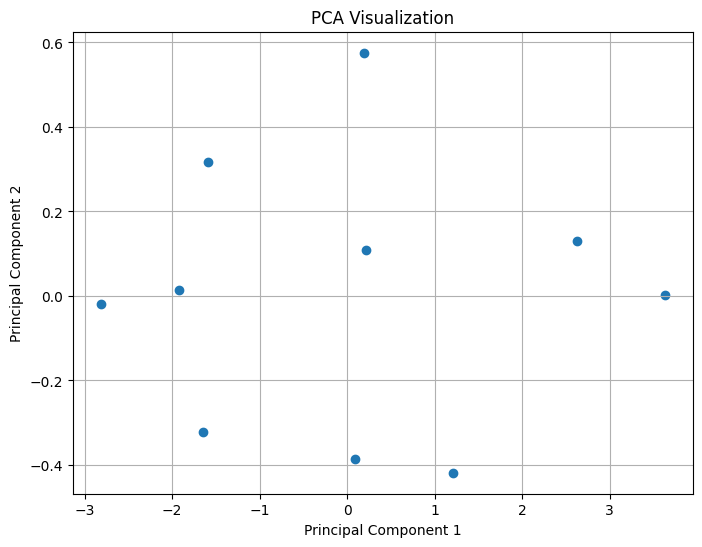

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid(True)
plt.show()